

#### NATURAL LANGUAGE PROCESSING

# Bag of Words

### NLP

###### Read - https://guardiancoder.com/2022/07/18/nlp/

In [58]:

#data - https://archive.ics.uci.edu/ml/datasets/sms+spam+collection


In [266]:
import os

os.getcwd()

'C:\\Users\\admin\\Desktop\\Rahul\\git\\DataSciencePython\\DeepLearning\\RNN-LSTM\\language model'

In [267]:
import pandas as pd

import numpy as np



In [268]:

df = pd.read_csv('./smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [348]:
import pandas as pd

df = pd.read_table('./smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [349]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [350]:
df.label.map(lambda x: x.upper())

0        HAM
1        HAM
2       SPAM
3        HAM
4        HAM
        ... 
5567    SPAM
5568     HAM
5569     HAM
5570     HAM
5571     HAM
Name: label, Length: 5572, dtype: object

'HAM'

In [351]:
df['label'] = df.label.map({'ham': 0, 'spam': 1})


In [352]:
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [353]:
df.message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [354]:
df['message'] = df.message.map(lambda x: x.lower())


#NLP





In [355]:
df['message'] 

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: message, Length: 5572, dtype: object

In [356]:
df['message'] = df.message.str.replace('[^\w\s]', '')

df['message']




C:\Users\admin\AppData\Local\Temp\ipykernel_18948\4266940005.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df.message.str.replace('[^\w\s]', '')


0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [357]:
import re



In [358]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [359]:
df.message

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [360]:
df.message.map(lambda x: re.sub("[!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]","",x))



0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: message, Length: 5572, dtype: object

In [68]:
# NLP processing

In [361]:
import nltk

#spacy




In [70]:
#Do ONCE ONLY

#nltk.download()




In [362]:
df['message'] = df['message'].apply(nltk.word_tokenize)


In [363]:
df['message']

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ü, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [364]:

df['message'] = df['message'].apply(lambda x: [word for word in x if word not in set(stops) ])



In [365]:
from nltk.stem import PorterStemmer, SnowballStemmer
#??SnowballStemmer

In [368]:

stemmer = SnowballStemmer(language="english")
 


In [369]:
df['message'] = df['message'].apply(lambda x: [stemmer.stem(i) for i in x])

In [373]:
df['message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [371]:
from nltk.corpus import stopwords

stops=stopwords.words("english")
stops


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [372]:
# This converts the list of words into space-separated strings
df['message'] = df['message'].apply(lambda x: ' '.join(x))

df['message'] 

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


#select top 100 features for creating feature vector

count_vect = CountVectorizer(max_features=100,ngram_range=(1,3))



In [ ]:
counts = count_vect.fit_transform(df['message'])
counts

In [304]:
#check the words that are part of feature vectors

count_vect.get_feature_names()


['alreadi',
 'amp',
 'ask',
 'babe',
 'back',
 'call',
 'cant',
 'care',
 'claim',
 'co',
 'come',
 'da',
 'dai',
 'dear',
 'didnt',
 'dont',
 'even',
 'feel',
 'free',
 'friend',
 'get',
 'give',
 'go',
 'good',
 'got',
 'great',
 'happi',
 'hei',
 'hi',
 'home',
 'hope',
 'ill',
 'im',
 'know',
 'last',
 'later',
 'leav',
 'let',
 'life',
 'like',
 'lor',
 'love',
 'ltgt',
 'make',
 'meet',
 'messag',
 'min',
 'miss',
 'mobil',
 'morn',
 'msg',
 'much',
 'na',
 'need',
 'new',
 'night',
 'number',
 'oh',
 'ok',
 'on',
 'phone',
 'pick',
 'pl',
 'pleas',
 'prize',
 'realli',
 'repli',
 'right',
 'sai',
 'said',
 'see',
 'send',
 'sorri',
 'still',
 'stop',
 'sure',
 'take',
 'tell',
 'text',
 'thank',
 'that',
 'thing',
 'think',
 'time',
 'todai',
 'tomorrow',
 'try',
 'txt',
 'ur',
 'wai',
 'wait',
 'wan',
 'want',
 'wat',
 'week',
 'well',
 'win',
 'work',
 'ye',
 'yeah']

In [206]:
import numpy as np 
import sys

np.set_printoptions(threshold=sys.maxsize)

In [305]:
counts


<5572x100 sparse matrix of type '<class 'numpy.int64'>'
	with 14720 stored elements in Compressed Sparse Row format>

In [297]:
#only run this if feature space is less than 100

counts.toarray()

#check presence of values/numbers 2 and 3 below. Tell me the Reason ?

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

In [388]:
df['message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [377]:
counts.data.shape

(14720,)

In [83]:
#5572 * 8145

#Pandas Dataframe # DENSE   ---- numpy sparse matrix
#45 million


# MODEL TRAINING

In [398]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], random_state=100,test_size=0.1)

In [399]:
y_test.index

Int64Index([ 601, 3183, 1229, 1711, 1248, 4398, 3347, 3693, 3402, 2635,
            ...
            2048, 2729,  786,  939, 3683, 2047, 2311,  260, 4555, 2886],
           dtype='int64', length=558)

In [400]:
# import the logistic regressor for CLASSIFICATION

from sklearn.linear_model import LogisticRegression

#REGULARIZATION --- L2 ridge and L1 --LASSO



??LogisticRegression

In [401]:

classify = LogisticRegression(C=1,
                              random_state=100,
                              max_iter=5000, 
                              penalty='l1', 
                              solver='saga') 

classify

LogisticRegression(C=1, max_iter=5000, penalty='l1', random_state=100,
                   solver='saga')

# training the algorithm

In [402]:
 
classify.fit(X_train, y_train) 

classify

LogisticRegression(C=1, max_iter=5000, penalty='l1', random_state=100,
                   solver='saga')

In [403]:
#To retrieve the intercept:
print(classify.intercept_)

#For retrieving the slope:
print(classify.coef_)

[-4.16113633]
[[ 2.76682905e+00  0.00000000e+00  0.00000000e+00 -2.28308679e-01
  -5.10313572e-01  0.00000000e+00  0.00000000e+00 -9.89718283e-02
   5.17202267e+00  5.44512494e-01  7.40817719e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.83663266e+00 -1.03910878e+00
   0.00000000e+00  3.32959583e+00  5.71023406e+00  0.00000000e+00
   8.33204162e+00  0.00000000e+00  4.70557982e+00 -2.19294263e-01
   4.33664179e+00  0.00000000e+00  0.00000000e+00  1.89408909e+00
  -1.22253497e+00  8.92319464e-01  0.00000000e+00 -8.30231030e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.22771240e+00  0.00000000e+00  1.03738226e+00  0.00000000e+00
   3.50579819e+00  0.00000000e+00 -1.20596317e-01  0.00000000e+00
   3.39237890e+00 -6.22713952e-01  0.00000000e+00  1.55321719e-01
   6.19115644e-01  2.40552324e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -7.89141841e-01  0.00000000e+00  1.69349380e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

In [404]:
#check the most influential word(s)
print(np.max(classify.coef_[0]), "\n", np.argmax(classify.coef_[0]))


8.332041621023311 
 20


In [405]:
#get the top words influencing the classification

count_vect.get_feature_names()[np.argmax(classify.coef_[0])]



C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'get'

In [ ]:
#ASSIGNMENT 

#get the 10 top words influencing the classification




In [ ]:
#create a wordcloud



# train accuracy score

In [406]:

classify.score(X_train,y_train)


0.9704826485839649

# test accuracy score

In [407]:

classify.score(X_test,y_test)
#0.9473684210526315

0.9516129032258065

In [322]:
X_test

<558x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1443 stored elements in Compressed Sparse Row format>

In [408]:

y_pred=classify.predict(X_test)

y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [409]:

#post prediction analysis on text data

pd.DataFrame(y_pred)

,0
0,1
1,0
2,0
3,0
4,0
...,...
553,0
554,1
555,0
556,0


In [410]:
pd.DataFrame(df['message'][y_test.index]).reset_index()


,index,message
0,601,mind blastin tsunami occur rajnik stop swim in...
1,3183,parent kidz friend n colleagu scream surpris w...
2,1229,free entri 250 week comp send word enter 84128...
3,1711,promis though havent even gotten dinner yet
4,1248,horribl gal sch stuff come u got mc
...,...,...
553,2047,aight fuck ill get later
554,2311,nokia 7250i get win free auction take part sen...
555,260,im park next mini come today think
556,4555,tri someth dear read someth exam


In [411]:
output = pd.concat(
                    [pd.DataFrame(df['message'][y_test.index]).reset_index(),
                     pd.DataFrame(y_pred)], 
          axis=1
    
          
)

output.columns=["index", "message","spam?"]

output

,index,message,spam?
0,601,mind blastin tsunami occur rajnik stop swim in...,1
1,3183,parent kidz friend n colleagu scream surpris w...,0
2,1229,free entri 250 week comp send word enter 84128...,0
3,1711,promis though havent even gotten dinner yet,0
4,1248,horribl gal sch stuff come u got mc,0
...,...,...,...
553,2047,aight fuck ill get later,0
554,2311,nokia 7250i get win free auction take part sen...,1
555,260,im park next mini come today think,0
556,4555,tri someth dear read someth exam,0


In [211]:
dataset=classify.predict_proba(X_test)

dataset


array([[7.15731441e-01, 2.84268559e-01],
       [9.97883309e-01, 2.11669141e-03],
       [3.25108602e-01, 6.74891398e-01],
       [9.70933347e-01, 2.90666530e-02],
       [9.97113985e-01, 2.88601473e-03],
       [9.75826788e-01, 2.41732118e-02],
       [9.62984560e-01, 3.70154399e-02],
       [9.94570100e-01, 5.42989968e-03],
       [9.62179900e-01, 3.78201000e-02],
       [9.79281555e-01, 2.07184452e-02],
       [2.64425994e-02, 9.73557401e-01],
       [9.83688249e-01, 1.63117507e-02],
       [9.83566827e-01, 1.64331729e-02],
       [3.83447993e-01, 6.16552007e-01],
       [9.54260273e-01, 4.57397274e-02],
       [9.97713098e-01, 2.28690198e-03],
       [9.36349375e-01, 6.36506250e-02],
       [9.62984560e-01, 3.70154399e-02],
       [9.86363826e-01, 1.36361743e-02],
       [9.73337730e-01, 2.66622698e-02],
       [9.82196494e-01, 1.78035064e-02],
       [9.63240070e-02, 9.03675993e-01],
       [9.82888071e-01, 1.71119288e-02],
       [9.76722292e-01, 2.32777079e-02],
       [9.737149

# metrics

In [96]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,y_pred ))


[[476   0]
 [ 26  56]]


In [412]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,y_pred ))


[[473   3]
 [ 24  58]]


<AxesSubplot: >

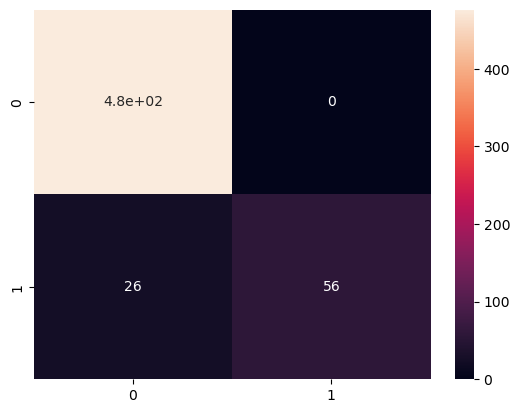

In [212]:

import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_test,y_pred ),annot=True)


In [98]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       476
           1       1.00      0.68      0.81        82

    accuracy                           0.95       558
   macro avg       0.97      0.84      0.89       558
weighted avg       0.96      0.95      0.95       558



In [ ]:
#ASSIGNMENT 

#https://www.kaggle.com/competitions/fake-news/data


In [ ]:
# assignment

#explore why BOW contains greater than 1

#ngrams >1

In [ ]:
#word embeddings

#word2vec

In [415]:
from gensim.models import word2vec

??word2vec

In [ ]:



#chatbot creation  -  Q&A machine


In [ ]:

#sentiment analysis


